# Z-score


- a statistical measurement that describes a value's relationship to the mean of a group of values
- measured in terms of standard deviation from the mean

Why is Z-score important for traders?
- it reveals if a value is typical/atypical for a specificied data set
- in other words, traders can identify potential buy/sell opportunities

How to read Z-score?
- 0: the data point's score is identical to the mean score
- 1.0: the value is one standard deviation from the mean
- 3.0: the value is three standard deviation from the mean

From a trader's interpretation:
- a z-score significantly higher than 1.5 might indicate that the stock is overprice compared to its historical average, while a value lower than -1.5 might indicate the oppposite

Z-scores may be positive of negative
- negative: it is below the mean
- positive: it is above the mean

Formula:

$$ z = (x - \mu)/\sigma $$

Where
- $z$ = Z-score
- $x$ = the value being evaluated
- $\mu$ = the mean
- $\sigma$ = the standard deviation


Reference: https://www.investopedia.com/terms/z/zscore.asp#:~:text=Z%2Dscore%20is%20a%20statistical,traders%20to%20help%20determine%20volatility.

## Calculating z-score

Imagine you have the following data:

Where
- $x$ = 57
- $\mu$ = 52
- $\sigma$ = 4

In [3]:
x = 57
mean = 52
std = 4

z = (x - mean) / std
z

1.25

In [4]:
# The x-value is indeed 1.25 standard deviation from the mean.
1.25 * std

5.0

## Comparing distribution using z-score

z-score can also be used to test if two distributions are equal. If they are equal, they belong to the same population.


When comparing two distributions, we usually come with null hypothesis, $h_0$ and an alternative hypothesis $h_a$.

The null hypothesis is usually indicates there is no difference between the distributions, aka they belong to the same population. If we reject the null hypothesis, it means there is a statistical significance and the two populations are not the same.

Two-tailed test are usually used to check if there is a difference in the distribution, when the direction doesn't matter, whether it is above or below the mean population.

One-tailed test is used when the direction is important, aka population A is greater/lower than population B.

In [5]:
import numpy as np
from matplotlib.pyplot import subplots
from scipy.stats import norm

## Plotting the Standard Normal Distribution (SND)

For the two-tailed test, what matters is the value lies between the lower and upper critical z-score.

When the $\alpha=0.05$, the lower and upper critical z-score represents the 2.5% ...

For two-tail experiments, we can find the critical z-score for the lower and upper bound using

In [161]:
alpha = 0.05
num_side = 2

lower = norm.ppf(alpha / num_side)
upper = norm.ppf(1 - alpha / num_side)

print("alpha: {}".format(alpha))
print(
    "p_val|z_score\n{}|{:+.2f}\n{}|{:+.2f}".format(
        alpha / num_side, lower, 1 - alpha / num_side, upper
    )
)
print()
alpha = 0.01
lower = norm.ppf(alpha / num_side)
upper = norm.ppf(1 - alpha / num_side)

print("alpha: {}".format(alpha))
print(
    "p_val|z_score\n{}|{:+.2f}\n{}|{:+.2f}".format(
        alpha / num_side, lower, 1 - alpha / num_side, upper
    )
)

alpha: 0.05
p_val|z_score
0.025|-1.96
0.975|+1.96

alpha: 0.01
p_val|z_score
0.005|-2.58
0.995|+2.58


In [7]:
norm.cdf(lower), norm.cdf(upper)

(0.02499999999999998, 0.975)

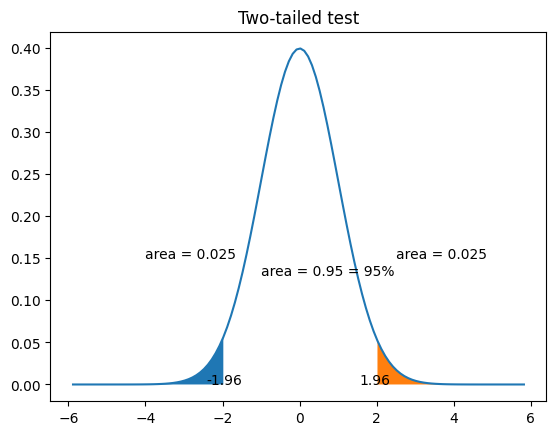

In [8]:
std_lim = 1.96  # 97.5% Confidence Interval (CI)

# Plot between -10 and 10 with 0.1 steps
X = np.arange(-std_lim * 3, std_lim * 3, 0.1)
ax = subplots()[1]
ax.set_title("Two-tailed test")

# Mean and std of any SND is always 0 and 1 respectively.
mean = 0
std = 1
pdf = norm.pdf(X, mean, std)
ax.plot(X, pdf)

lo = mean - std_lim * std
hi = mean + std_lim * std

ax.fill_between(X, pdf, where=(X <= norm.ppf(0.025)))
ax.fill_between(X, pdf, where=((X >= norm.ppf(0.975))))
ax.text(lo, 0, lo, ha="center")
ax.text(hi, 0, hi, ha="center")


ax.text(2.5, 0.15, "area = 0.025")
ax.text(-1, 0.13, "area = 0.95 = 95%")
ax.text(-4, 0.15, "area = 0.025");

In [9]:
alpha = 0.05
num_side = 2


# To compute the critical z-score
lower_z_critical = norm.ppf(alpha / num_side)
upper_z_critical = norm.ppf(1 - alpha / num_side)
lower_z_critical, upper_z_critical

(-1.9599639845400545, 1.959963984540054)

In [10]:
# z-score to p-value
norm.cdf(lower_z_critical), norm.cdf(upper_z_critical)

(0.02499999999999998, 0.975)

In [11]:
# If we want to test that the distribution B is lower than distribution A, then
# we can reject the null hypothesis if the p-value is below the lower critical z-score.
p = norm.cdf(lower_z_critical)
assert p < alpha

# Similarly if we want to test that the distribution B is higher than distribution A,
# then we reject the null hypothesis if the p-value is greater than the upper critical z-score.
# We use norm.sf, which is 1 - cdf and check if the value is less than alpha.
p = norm.sf(upper_z_critical)
assert p < alpha
p

0.024999999999999998

In [12]:
norm.sf(abs(lower_z_critical)) < alpha

True

In [162]:
alpha = 0.05
num_side = 1

lower = norm.ppf(alpha / num_side)  # norm.ppf(0.05)
upper = norm.ppf(1 - alpha / num_side)  # norm.ppf(0.95)

print('alpha: {}'.format(alpha))
print(
    "p_val|z_score\n{}|{:+.3f}\n{}|{:+.3f}".format(
        alpha / num_side, lower, 1 - alpha / num_side, upper
    )
)
print()

alpha = 0.01

lower = norm.ppf(alpha / num_side)  # norm.ppf(0.05)
upper = norm.ppf(1 - alpha / num_side)  # norm.ppf(0.95)

print('alpha: {}'.format(alpha))
print(
    "p_val|z_score\n{}|{:+.3f}\n{}|{:+.3f}".format(
        alpha / num_side, lower, 1 - alpha / num_side, upper
    )
)

alpha: 0.05
p_val|z_score
0.05|-1.645
0.95|+1.645

alpha: 0.01
p_val|z_score
0.01|-2.326
0.99|+2.326


In [14]:
norm.cdf(lower), norm.cdf(upper)

(0.049999999999999975, 0.95)

In [15]:
norm.sf(abs(lower)), norm.sf(abs(upper))

(0.049999999999999975, 0.05000000000000007)

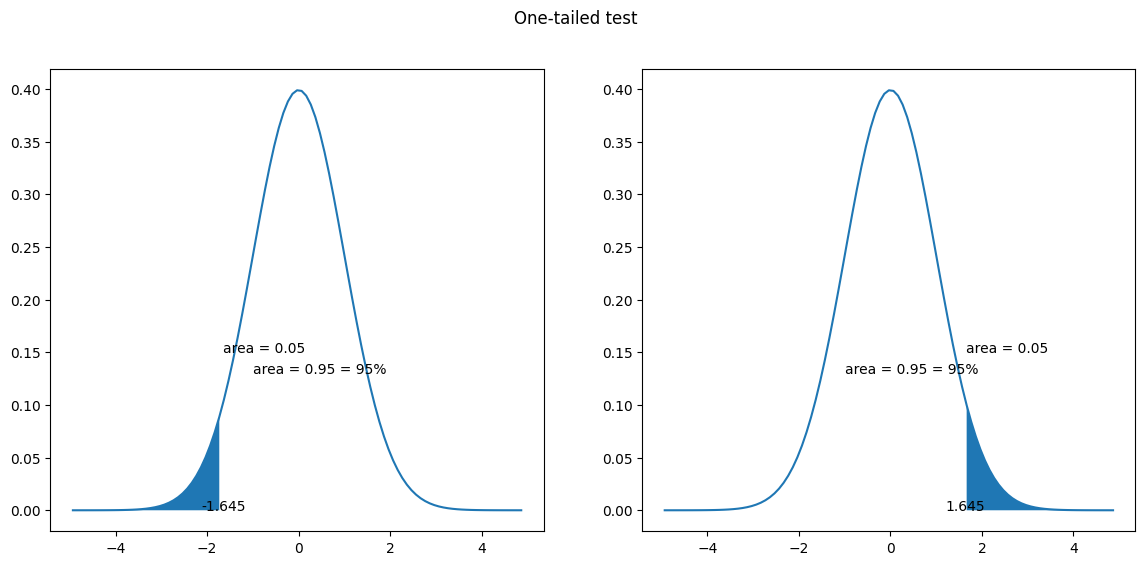

In [16]:
import numpy as np
from matplotlib.pyplot import subplots
from scipy.stats import norm

std_lim = 1.645  # 90% Confidence Interval (CI)

# Plot between -10 and 10 with 0.1 steps
X = np.arange(-std_lim * 3, std_lim * 3, 0.1)
fig, axs = subplots(ncols=2)
fig.suptitle("One-tailed test")
fig.set_size_inches((14, 6))

# Mean and std of any SND is always 0 and 1 respectively.
mean = 0
std = 1
pdf = norm.pdf(X, mean, std)
axs[0].plot(X, pdf)

lo = mean - std_lim * std
hi = mean + std_lim * std

# ax.fill_between(X, pdf, where=(X > lo) & (X < hi))
axs[0].fill_between(X, pdf, where=(X < norm.ppf(0.05)))
axs[0].text(lo, 0, lo, ha="center")
axs[0].text(-1, 0.13, "area = 0.95 = 95%")
axs[0].text(norm.ppf(0.05), 0.15, "area = 0.05")

axs[1].plot(X, pdf)
axs[1].fill_between(X, pdf, where=(X > norm.ppf(0.95)))
axs[1].text(hi, 0, hi, ha="center")
axs[1].text(-1, 0.13, "area = 0.95 = 95%")
axs[1].text(norm.ppf(0.95), 0.15, "area = 0.05");

Observation:
- the probability of randomly selecting a score between -1.96 and +1.96 standard deviations from the mean is 95%.
- if there is less than a 5% chance of a raw score being selected randomly, then this is a statistically significant result

the two-tailed test shows evidence that the control and variation are different, but the one-tailed test shows evidence if variation is better than the control.

According to a unit normal table, the values for a z-score of 1.64 are 0.9495, 0.0505, and 0.4495. The values for a z-score of 2.48 are 0.9934, 0.0066, and 0.4934. 

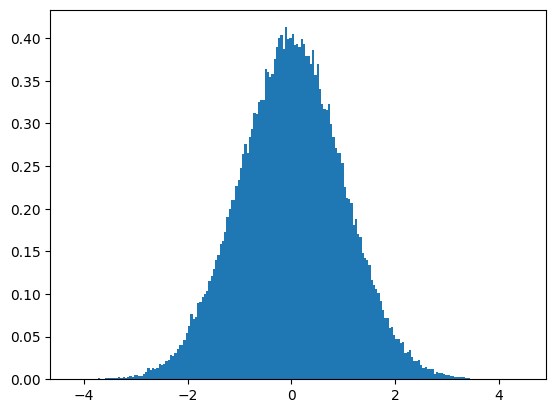

In [17]:
vals = np.random.standard_normal(100000)
ax = subplots()[1]
ax.hist(vals, bins=200, density=True);

## Finding z-score and p-value using scipy

Calculate critical z-scores from the given alpha.

In [18]:
alpha = 0.05
one_tail = [norm.ppf(alpha / 1), norm.ppf(1 - alpha / 1)]
two_tail = [norm.ppf(alpha / 2), norm.ppf(1 - alpha / 2)]
one_tail, two_tail

([-1.6448536269514729, 1.644853626951472],
 [-1.9599639845400545, 1.959963984540054])

Calculate p-value from the given z-scores.

In [19]:
one_tail = [norm.cdf(z) for z in one_tail]
two_tail = [norm.cdf(z) for z in two_tail]
one_tail, two_tail

([0.049999999999999975, 0.95], [0.02499999999999998, 0.975])

## Performing the Z-test

In [20]:
import statsmodels
import statsmodels.stats.api as sm

print(statsmodels.__version__)

0.14.4


In [21]:
def calculate_pvalue(n_obs1, mean1, n_obs2, mean2):
    """This is similar to how abtest calculates it"""
    std_err1 = np.sqrt(mean1 * (1 - mean1) / n_obs1)
    std_err2 = np.sqrt(mean2 * (1 - mean2) / n_obs2)
    std_err_delta = np.sqrt(std_err1**2 + std_err2**2)
    z_score = (mean2 - mean1) / std_err_delta
    p = norm.sf(abs(z_score))
    # uplift = (mean2 - mean1) / mean1
    return p


pval = calculate_pvalue(80000, 1600 / 80000, 80000, 1696 / 80000)
pval, pval < 0.05

(0.04554571556583972, True)

Below we use statsmodel to achieve similar result

In [23]:
# To check statistical significance
count = [1600, 1696]  # smaller: p1 < p2
nobs = [80000, 80000]
stat, pval = sm.proportions_ztest(count, nobs, alternative="smaller", prop_var=False)
stat, pval, pval < 0.05

(-1.6896532254015406, 0.04554715838988184, True)

## Sample Size Calculation

The sample size calculated below is similar to the ones in [abtestguide](https://abtestguide.com/abtestsize/)

In [25]:
expected_improvement = 0.15  # 15%
p1 = 0.02
p2 = (1 + expected_improvement) * p1
one_sided = sm.samplesize_proportions_2indep_onetail(
    p2 - p1, p1, 0.8, alternative="larger"
)
two_sided = sm.samplesize_proportions_2indep_onetail(
    p2 - p1, p1, 0.8, alternative="two-sided"
)

round(one_sided), round(two_sided)

(28903, 36693)

I couldn't find the equivalent when using statsmodel

In [31]:
from math import ceil

init_prop = 0.02
mde_prop = 0.02 * 1.15
effect_size = sm.proportion_effectsize(init_prop, mde_prop)
print(
    f"For a change from {init_prop:.2f} to {mde_prop:.2f} - the effect size is {effect_size:.4f}."
)


sample_size = sm.zt_ind_solve_power(
    effect_size=effect_size, nobs1=None, alpha=0.05, power=0.8, alternative="two-sided"
)
print(
    f"{ceil(sample_size)} sample size required given power analysis and input parameters."
)

For a change from 0.02 to 0.02 - the effect size is -0.0207.
36650 sample size required given power analysis and input parameters.


In [33]:
def calculate_effect_size(baseline_rate, expected_rate):
    # Calculate standard deviations for both rate based on Bernoulli distribution.
    # https://math.stackexchange.com/questions/1716156/sd-of-a-bernoulli-trial
    std_base = np.sqrt(baseline_rate * (1 - baseline_rate))
    std_exp = np.sqrt(expected_rate * (1 - expected_rate))

    # Calculate the pooled standard deviation.
    pooled_std = np.sqrt((std_base**2 + std_exp**2) / 2)

    # Calculate the effect size.
    effect_size = (expected_rate - baseline_rate) / pooled_std
    return effect_size


effect_size = calculate_effect_size(0.02, 0.02 * 1.15)
sample_size = sm.zt_ind_solve_power(
    effect_size=effect_size, nobs1=None, alpha=0.05, power=0.8, alternative="two-sided"
)
print(
    f"{ceil(sample_size)} sample size required given power analysis and input parameters."
)

36690 sample size required given power analysis and input parameters.


In [89]:
es = sm.proportion_effectsize(0.02, 0.023)
m = sm.tt_ind_solve_power(
    effect_size=es, ratio=1, power=0.8, alpha=0.05, alternative="two-sided"
)
n = sm.tt_ind_solve_power(
    effect_size=es, ratio=1, power=0.8, alpha=0.05, alternative="smaller"
)
m, n

(36650.74612637405, 28869.758338145828)